In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')

In [2]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
107022,0.957913,0.183753,0.044705,0.119618,-0.982998,0.755505,1.051748,-0.465445,0.223363,-1.240205,0
18856,0.957913,-0.809172,0.044705,-0.824421,1.070422,-1.049090,-1.000477,-0.968063,0.757866,0.400934,0
25287,0.957913,0.580923,0.044705,0.119618,-0.982998,0.755505,1.051748,2.877148,0.223363,1.564429,0
159248,0.957913,-0.213417,0.044705,-1.453781,-0.982998,0.755505,1.051748,-0.189373,-0.005409,-0.823797,0
101273,-1.099543,-1.073952,0.044705,0.670307,1.070422,-1.049090,0.035602,-0.784015,0.757866,0.633633,0


In [3]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
25696,0.957913,-1.073952,0.044705,0.984987,-0.982998,-1.049090,1.051748,-0.621159,0.757866,-0.223678,0
8672,0.957913,1.044288,0.044705,1.850356,1.070422,0.755505,-1.000477,-0.397773,-1.991007,1.772633,0
1741,0.957913,0.713313,0.044705,1.614346,-0.982998,0.755505,1.051748,0.648558,0.223363,1.172515,0
29211,0.957913,-1.073952,0.044705,0.198288,-0.982998,-1.049090,1.051748,-3.726433,-2.124633,-1.436162,0
921,-1.099543,-0.742977,0.044705,0.276958,1.070422,-1.049090,-1.000477,-1.164169,0.757866,-0.076711,0


0    202945
1     27686
Name: Tertarik, dtype: int64


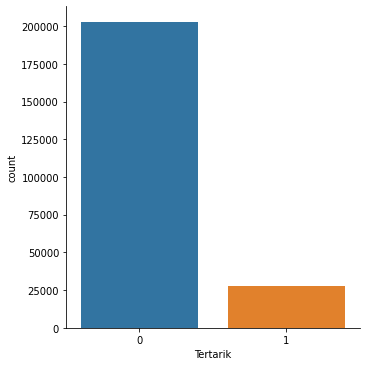

In [4]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [5]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (184504, 10)
x_test shape: (46127, 10)
---------------------------------
y_train shape: (184504,)
y_test shape: (46127,)


## **Tuning Model**

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [8]:
from imblearn.ensemble import BalancedBaggingClassifier

classifier = [
    DecisionTreeClassifier(
        random_state=42, splitter="random", class_weight='balanced'),
    LogisticRegression(max_iter=5000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
    BalancedBaggingClassifier()
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting',
    'AdaBoost',
    'Random Forest',
    'Balanced Bagging Classifier'
]


In [9]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [10]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 83.09
Akurasi model Logistic Regression: 87.99
Akurasi model Gradient Boosting: 88.01
Akurasi model AdaBoost: 87.97
Akurasi model Random Forest: 87.22
Akurasi model Balanced Bagging Classifier: 77.08


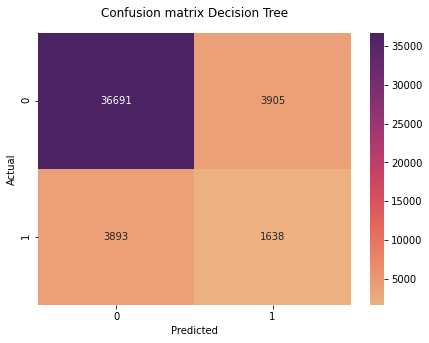


               precision    recall  f1-score   support

           0       0.90      0.90      0.90     40596
           1       0.30      0.30      0.30      5531

    accuracy                           0.83     46127
   macro avg       0.60      0.60      0.60     46127
weighted avg       0.83      0.83      0.83     46127




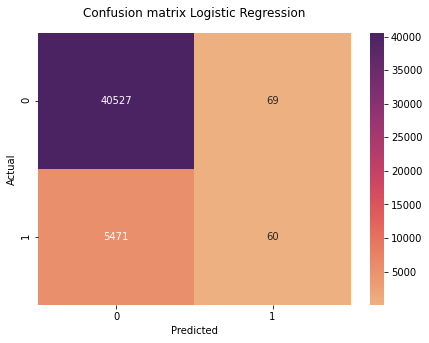


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40596
           1       0.47      0.01      0.02      5531

    accuracy                           0.88     46127
   macro avg       0.67      0.50      0.48     46127
weighted avg       0.83      0.88      0.83     46127




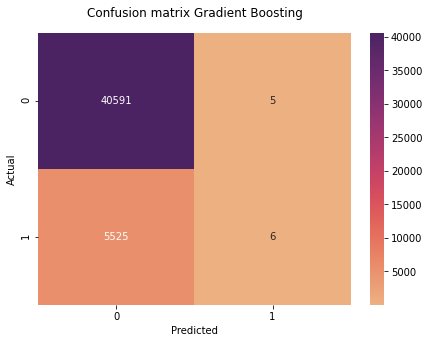


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40596
           1       0.55      0.00      0.00      5531

    accuracy                           0.88     46127
   macro avg       0.71      0.50      0.47     46127
weighted avg       0.84      0.88      0.82     46127




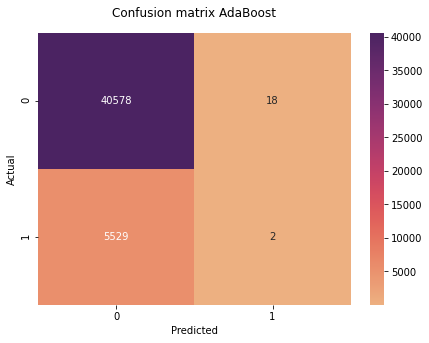


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40596
           1       0.10      0.00      0.00      5531

    accuracy                           0.88     46127
   macro avg       0.49      0.50      0.47     46127
weighted avg       0.79      0.88      0.82     46127




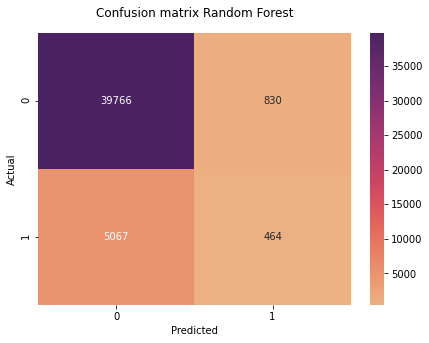


               precision    recall  f1-score   support

           0       0.89      0.98      0.93     40596
           1       0.36      0.08      0.14      5531

    accuracy                           0.87     46127
   macro avg       0.62      0.53      0.53     46127
weighted avg       0.82      0.87      0.84     46127




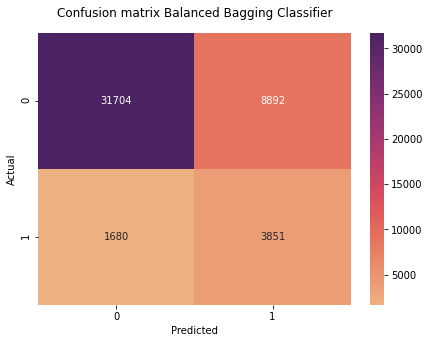


               precision    recall  f1-score   support

           0       0.95      0.78      0.86     40596
           1       0.30      0.70      0.42      5531

    accuracy                           0.77     46127
   macro avg       0.63      0.74      0.64     46127
weighted avg       0.87      0.77      0.80     46127




In [11]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

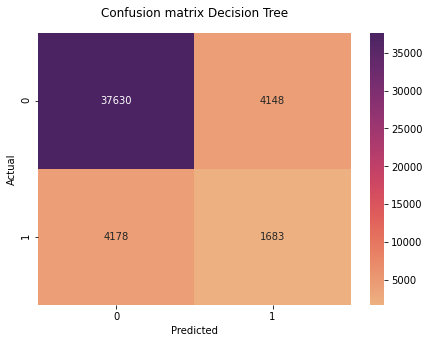


               precision    recall  f1-score   support

           0       0.90      0.90      0.90     41778
           1       0.29      0.29      0.29      5861

    accuracy                           0.83     47639
   macro avg       0.59      0.59      0.59     47639
weighted avg       0.82      0.83      0.83     47639




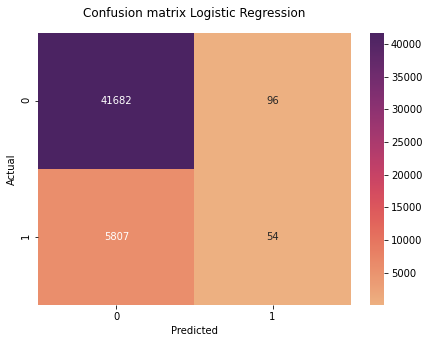


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.36      0.01      0.02      5861

    accuracy                           0.88     47639
   macro avg       0.62      0.50      0.48     47639
weighted avg       0.81      0.88      0.82     47639




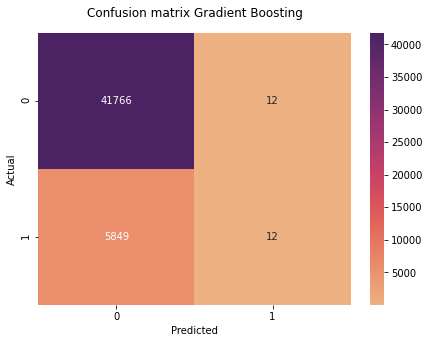


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.50      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.69      0.50      0.47     47639
weighted avg       0.83      0.88      0.82     47639




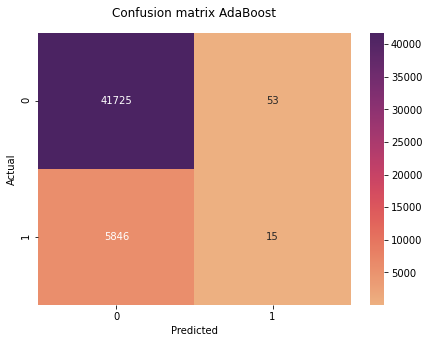


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.22      0.00      0.01      5861

    accuracy                           0.88     47639
   macro avg       0.55      0.50      0.47     47639
weighted avg       0.80      0.88      0.82     47639




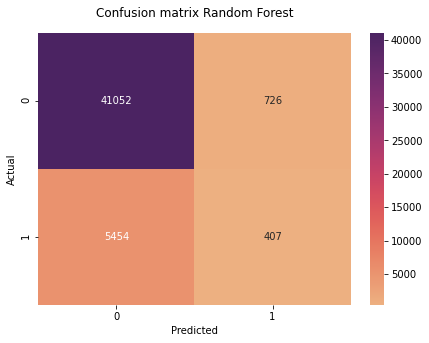


               precision    recall  f1-score   support

           0       0.88      0.98      0.93     41778
           1       0.36      0.07      0.12      5861

    accuracy                           0.87     47639
   macro avg       0.62      0.53      0.52     47639
weighted avg       0.82      0.87      0.83     47639




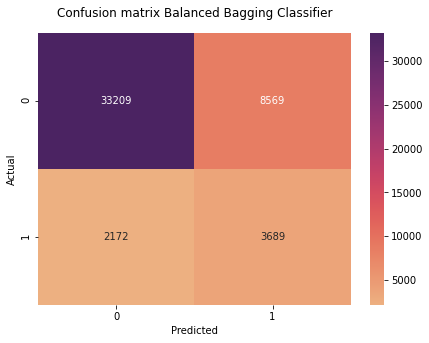


               precision    recall  f1-score   support

           0       0.94      0.79      0.86     41778
           1       0.30      0.63      0.41      5861

    accuracy                           0.77     47639
   macro avg       0.62      0.71      0.63     47639
weighted avg       0.86      0.77      0.80     47639




In [12]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
